<a href="https://colab.research.google.com/github/NdanyuzweP/Data-Preprocessing/blob/main/ml_pipeline_Prince_Ndanyuzwe_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Processing Approach for Portfolio Project

## Project Title: Potato Leaf Disease Detection

## Student Name: Prince Ndanyuzwe

---

1. **Data Sources and Aggregation:**
   - List all sources of data for the project. **You must consider sources outside kaggle, google datasets** (insert links where necessary to online platforms,research papers etc)

    Kaggle:https://www.kaggle.com/datasets/rizwan123456789/potato-disease-leaf-datasetpld

    PlantVillage Dataset:https://github.com/spMohanty/PlantVillage-Dataset

    CABI Plantwise:https://www.cabi.org/plantwiseplus/

   
   - Determine if data aggregation from multiple sources is necessary for comprehensive analysis.

   *Data Aggregation

  Since plant diseases can vary widely depending on environmental factors, aggregating data from multiple sources may enhance the model's robustness. For example, combining images from different climates or soil types could make the model more generalizable to new data.





2. **Data Format Transformation:**
   - Describe the current format of the data.
   - Outline the planned transformation to a unified format suitable for analysis and modeling.

 **Current Format**

  The data is currently stored as images in JPEG format

  **Planned Transformation**

   Images will be resized to a standard dimension (128x128 pixels) and normalized to a [0, 1] range.



In [27]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

image_size = (128, 128)
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "path_to_images", image_size=image_size, batch_size=32
)


Found 533 files belonging to 2 classes.


3. **Data Exploration:**
   - Enumerate the features included in the dataset.
   
   Features

  Image data (pixel values)

  Label (Healthy, Early Blight, Late Blight)

   - Summarize findings from exploratory data analysis (EDA) including distributions, correlations, and outliers.
   
    Initial EDA shows the distribution of each class (e.g., Healthy, Early Blight, Late Blight).

   
  **Insert code for data exploration below**

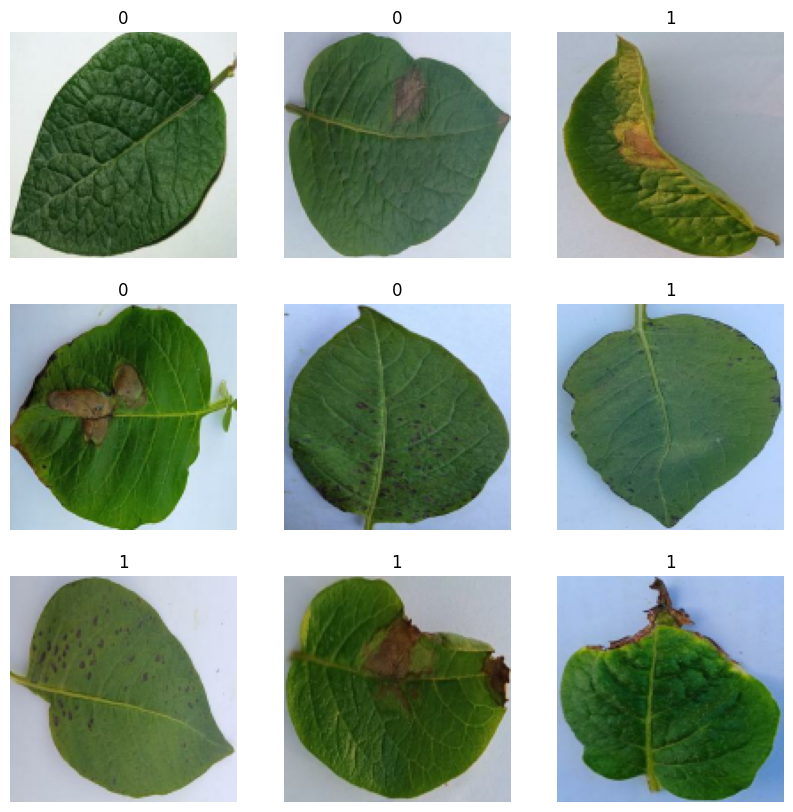

In [23]:


for images, labels in dataset.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")




4. **Hypothesis Testing:**
   - State any preexisting hypotheses about the data.
   - Explain methodologies to empirically test these hypotheses.

  **Hypotheses**

  Hypothesis 1: Diseased leaves will have distinct color and texture patterns that differ from healthy leaves.
  Hypothesis 2: Leaf diseases of the same type will have similar pixel intensity distributions.

  **Testing Methodologies**

  To test these hypotheses, we can analyze the pixel distributions and texture gradients in diseased vs. healthy leaves, then apply statistical tests or clustering to confirm whether diseased leaf patterns group differently from healthy ones.


5. **Handling Sparse/Dense Data and Outliers:**
   - Assess the density of the data.
   - Propose strategies to handle missing data and outliers while maintaining dataset integrity.

   **Data Density and Missing Values**

  Since this dataset consists mainly of image files, there are generally no missing values. However, outliers could exist in the form of mislabeled or corrupt images.

  **Strategies for Handling Outliers**

  Remove or relabel images with unclear visual characteristics.
Use data augmentation to handle sparse data in certain classes if needed.

   **Insert code for Handling Sparse/Dense Data and Outliers below**

In [24]:


mean_intensities_diseased = []
mean_intensities_healthy = []

for images, labels in dataset:
    for image, label in zip(images, labels):
        if label.numpy() == 1:  # Diseased
            mean_intensities_diseased.append(image.numpy().mean())
        elif label.numpy() == 0:  # Healthy
            mean_intensities_healthy.append(image.numpy().mean())

# Compute the overall mean intensity for each class
mean_intensity_diseased = np.mean(mean_intensities_diseased)
mean_intensity_healthy = np.mean(mean_intensities_healthy)

# Display results
print(f"Mean Intensity - Diseased: {mean_intensity_diseased}")
print(f"Mean Intensity - Healthy: {mean_intensity_healthy}")


Mean Intensity - Diseased: 114.09909057617188
Mean Intensity - Healthy: 109.89033508300781


6. **Data Splitting:**
   - Define a methodology to split the dataset into training, validation, and testing sets.
   - Ensure randomness and representativeness in each subset.

   **Methodology for Splitting**

  The dataset will be split into:

  Training set (70%)

  Validation set (15%)

  Test set (15%)

7. **Bias Mitigation:**
   - Implement techniques to identify and mitigate biases in the dataset.
   - Ensure fairness and equity in data representation.

   **To ensure fairness, we will:**

  Balance the dataset through oversampling or undersampling if any class is underrepresented.
Use stratified splitting so each subset has a similar class distribution.
   
    **Your answer for Hypothesis Testing goes here **



In [30]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

mean_pixel_intensity = []
labels = []

for images, label_batch in dataset.take(10):
    for img, lbl in zip(images, label_batch):
        mean_pixel_intensity.append(np.mean(img.numpy()))
        labels.append(lbl.numpy())

df = pd.DataFrame({
    'Mean_Intensity': mean_pixel_intensity,
    'Label': labels
})

# Encode labels (if categorical)
label_encoder = LabelEncoder()
df['Encoded_Label'] = label_encoder.fit_transform(df['Label'])

# Calculate correlation
correlation_matrix = df.corr()
print(correlation_matrix)


                Mean_Intensity     Label  Encoded_Label
Mean_Intensity        1.000000  0.180961       0.180961
Label                 0.180961  1.000000       1.000000
Encoded_Label         0.180961  1.000000       1.000000


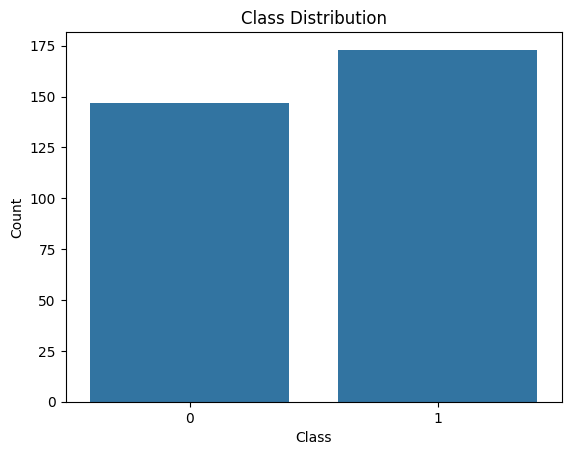

In [29]:
class_counts = pd.DataFrame({'Label': labels})
sns.countplot(data=class_counts, x='Label')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [19]:
# data splitting
train_ds = dataset.take(int(len(dataset) * 0.7))
val_ds = dataset.skip(int(len(dataset) * 0.7)).take(int(len(dataset) * 0.15))
test_ds = dataset.skip(int(len(dataset) * 0.85))

normalized_ds = dataset.map(lambda x, y: (x / 255.0, tf.one_hot(y, depth=3)))


8. **Features for Model Training:**
   - Identify relevant features for training the model.
   - Rank features based on their significance to project objectives.

  **Relevant Features**

  Image pixel values: Primary input for detecting leaf disease.
Label: Target variable for classification.
9. **Types of Data Handling:**
   - Classify the types of data (categorical, numerical, etc.) present in the dataset.
   - Plan preprocessing steps for each data type.

   This dataset involves images (numeric pixel values) and categorical labels.

   - Normalize pixel values.
   
   - One-hot encode labels.




10. **Data Transformation for Modeling:**
    - Specify methods for transforming raw data into a model-friendly format.
    - Detail steps for normalization, scaling, or encoding categorical variables.

  **Transformation Steps**

  Normalization: Scale image pixel values to [0,1].

  Encoding: One-hot encode class labels.

11. **Data Storage:**
    - Determine where and how processed data will be stored.
    - Choose suitable storage solutions ensuring accessibility and security.

  **Storage Solution**

  Processed data will be saved as a TFRecord for easy integration with TensorFlow models. For accessibility and security, it will be stored in a cloud environment.

---

#### Notes:
- This template provides a structured framework for documenting your data processing approach for the portfolio project.
- Fill out each section with specific details relevant to your project's requirements and objectives.
- Use additional cells as needed to provide comprehensive information.